In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [6]:
data = pd.read_csv("./datasets/USA_Housing.csv")
data.head(2)

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...

In [7]:
# data.describe()

In [36]:
x = data.loc[:,'Avg. Area Income':'Area Population']
x = x.astype(int)
print(x)

      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0                79545                    5                          7   
1                79248                    6                          6   
2                61287                    5                          8   
3                63345                    7                          5   
4                59982                    5                          7   
...                ...                  ...                        ...   
4995             60567                    7                          6   
4996             78491                    6                          6   
4997             63390                    7                          4   
4998             68001                    5                          7   
4999             65510                    5                          6   

      Avg. Area Number of Bedrooms  Area Population  
0                                4            23086  
1  

In [34]:
y = data.loc[:,'Price']
y = y.astype(int)
print(y)

0       1059033
1       1505890
2       1058987
3       1260616
4        630943
         ...   
4995    1060193
4996    1482617
4997    1030729
4998    1198656
4999    1298950
Name: Price, Length: 5000, dtype: int64


In [44]:
#Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

#Initialize regressor
regressor = LinearRegression()

#Begin fitting the training sets
regressor.fit(X_train, y_train)

LinearRegression()

In [46]:
#Find the score R2-score for training sets
regressor.score(X_train, y_train)

0.893967423889695

In [45]:
#Find the score R2-score for test sets
regressor.score(X_test, y_test)

0.8902848199906951

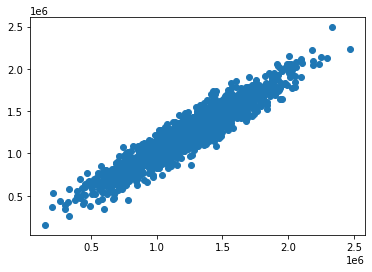

In [47]:
#Scatterplot of testing set
predicted = regressor.predict(X_test)
plt.scatter(y_test, predicted)

# #scatterplot of training set
# predicted = regressor.predict(X_train)
# plt.scatter(y_train, predicted)

In [48]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': predicted.astype(int), 'Difference': predicted.astype(int) - y_test})
df

Actual  Predicted  Difference
1501  1339096    1378642       39546
2586  1251794    1118833     -132961
2653  1340094    1182324     -157770
1055  1431507    1204423     -227084
705   1042373    1111179       68806
...       ...        ...         ...
908   1383967    1329421      -54546
2114  1203089    1189295      -13794
3896   859208    1043931      184723
1627  1509422    1531148       21726
2873   998702     970766      -27936

[1650 rows x 3 columns]

In [49]:
#find RMSE 
print(np.sqrt(metrics.mean_squared_error(y_test, predicted)))

114729.22053996616


In [50]:
#Save model
pickle.dump(regressor, open('model.pkl', 'wb'))